In [1]:
%matplotlib inline
#import sdf
import matplotlib  as  mpl
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
#mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

part_number=1
nsteps=3999

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
a0=10.0
plt.scatter(x[index,:], y[index,:], c=t[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
#cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
#cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$kx$',fontdict=font)
plt.ylabel(r'$ky$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]),py[index,:], c=t[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
#cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
#cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\omega t $',fontdict=font)
plt.ylabel(r'$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]),px[index,:], c=t[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
#cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
#cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\omega t$',fontdict=font)
plt.ylabel(r'$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,5)
plt.scatter((t[index,:]), R_dep[index,:], c=t[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
#cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
#cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\omega t$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,6)
plt.scatter(px[index,:],py[index,:], c=t[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
#cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
#cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$p_x [m_ec]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter(t[index,:],gamma[index,:], c=t[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\omega t$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

fig = plt.gcf()
fig.set_size_inches(28, 18)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./summary/a=0_b=0.01_py=100.png',format='png',dpi=1280)
#plt.close("all")

KeyboardInterrupt: 

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


(0.0001, 10.0)

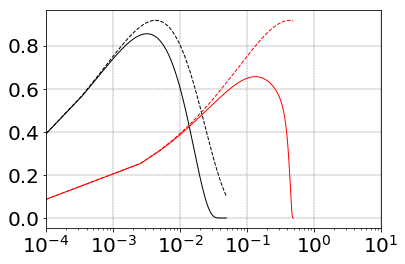

In [105]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import kv
  
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',
        'style'  : 'normal',
        'color'  : 'black',
            'weight' : 'normal',
        'size'   : 20,
       }

b0 = 200.0
g0 = 205.0
eta = g0*b0/4.1e5
#eta = 0.1
chi = np.linspace(1e-4,0.49*eta,200)
y   = 2*chi/(3*eta*(eta-2*chi))
y_c = 2*chi/(3*eta*eta)
F_chi = np.zeros_like(chi)
F_chi_c = np.zeros_like(chi)
for i in range(np.size(chi)):
    result = integrate.quad(lambda x: kv(1.6666666667,x), y[i], 1e4)
    F_chi[i] = 4*chi[i]**2/eta**2*y[i]*kv(0.6666666667,y[i])+(1-2*chi[i]/eta)*y[i]*result[0]
#    print(result)
    result = integrate.quad(lambda x: kv(1.6666666667,x), y_c[i], 1e4)
    F_chi_c[i]=y_c[i]*result[0]
#F_chi_s = 8*chi**2/3/(3)**0.5/np.pi/eta**4*((1+(1-2*chi/eta)**(-2))*0.921*(y)**(-5.0/3) + 2*(1-2*chi/eta)**(-1)*0.307*(y)**(-5.0/3) + (2*chi/eta)**2*(1-2*chi/eta)**(-2)*0.307*(y)**(-5.0/3)  )
plt.plot(chi, F_chi, '-k',linewidth=1)
plt.plot(chi, F_chi_c, '--k',linewidth=1)

b0 = 200.0
g0 = 2050.0
eta = g0*b0/4.1e5
#eta = 0.1
chi = np.linspace(1e-4,0.49*eta,200)
y   = 2*chi/(3*eta*(eta-2*chi))
y_c = 2*chi/(3*eta*eta)
F_chi = np.zeros_like(chi)
F_chi_c = np.zeros_like(chi)
for i in range(np.size(chi)):
    result = integrate.quad(lambda x: kv(1.6666666667,x), y[i], 1e4)
    F_chi[i] = 4*chi[i]**2/eta**2*y[i]*kv(0.6666666667,y[i])+(1-2*chi[i]/eta)*y[i]*result[0]
#    print(result)
    result = integrate.quad(lambda x: kv(1.6666666667,x), y_c[i], 1e4)
    F_chi_c[i]=y_c[i]*result[0]
#F_chi_s = 8*chi**2/3/(3)**0.5/np.pi/eta**4*((1+(1-2*chi/eta)**(-2))*0.921*(y)**(-5.0/3) + 2*(1-2*chi/eta)**(-1)*0.307*(y)**(-5.0/3) + (2*chi/eta)**2*(1-2*chi/eta)**(-2)*0.307*(y)**(-5.0/3)  )
plt.plot(chi, F_chi, '-r',linewidth=1)
plt.plot(chi, F_chi_c, '--r',linewidth=1)



#plt.plot(chi, F_chi_s, '--g',linewidth=1)
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
#cbar.set_label(r'$log_{10}\frac{dI}{\sin\theta d\theta d\omega}$'+' [A.U.]', fontdict=font)
#cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
#plt.xlabel('$\omega$ [$\omega_0$]',fontdict=font)
#plt.ylabel(r'$\frac{dI^2}{d\omega d\Omega}$'+' [$m_ec^2/\omega_0$]',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.xscale('log')
#plt.yscale('log')
plt.xlim(1e-4,1e1)



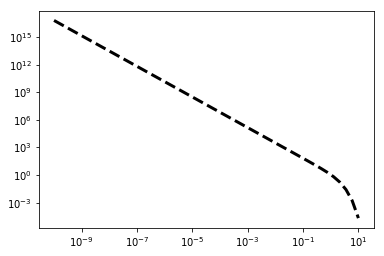

In [76]:
x=np.logspace(-10,1)
plt.plot(x, kv(1.6666666667,x), '--k',linewidth=3) 
plt.xscale('log')
plt.yscale('log')

In [97]:
integrate.quad(lambda x: kv(1.6666666667,x), 1e-5, 1e4)

(4629.204413168501, 4.639269491946152e-05)

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


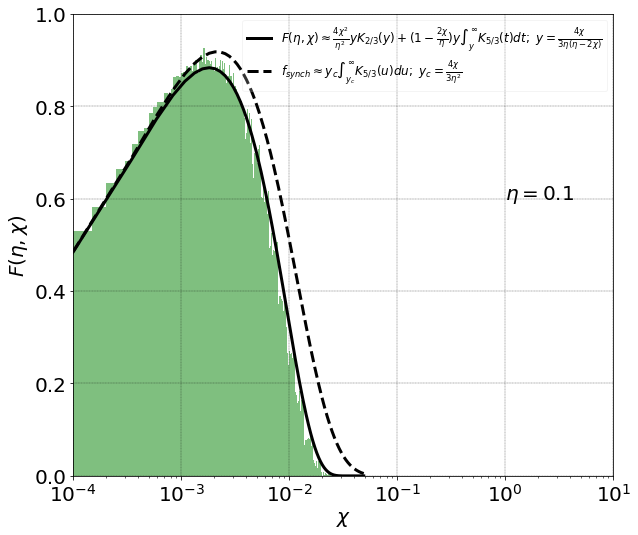

In [143]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import kv
  
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',
        'style'  : 'normal',
        'color'  : 'black',
            'weight' : 'normal',
        'size'   : 20,
       }


gg=np.loadtxt('./Data_01/px_0.txt')
b0=np.loadtxt('./Data_01/bz_part_0.txt')
t0=np.loadtxt('./Data_01/t_0.txt')
gg = gg[1]
b0 = b0[1]
t0 = t0[-1]

insert1='./Data_01/'
insert_n='_0'
photon=np.loadtxt(insert1+'qed_photon'+insert_n+'.txt')
chi   = photon*b0/2.0/4.1e5
gamma = gg
eta   = gg*b0/4.1e5
dt    = t0/6.28*3.333e-15

num_bins = 1000


weight_photon = gamma/eta*h_planck*chi/1.7/(m0*v0**2)*137/dt/(0.05/num_bins)
#weight_photon = gamma
# the histogram of the data
n, bins, patches = plt.hist(chi, num_bins,weights=weight_photon, range=(1e-4,0.05), normed=0, facecolor='green', alpha=0.5)
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)


b0 = 200.0
g0 = 205.0
eta = g0*b0/4.1e5
#eta = 0.1
chi = np.linspace(1e-4,0.49*eta,200)
y   = 4*chi/(3*eta*(eta-2*chi))
y_c = 4*chi/(3*eta*eta)
F_chi = np.zeros_like(chi)
F_chi_c = np.zeros_like(chi)
for i in range(np.size(chi)):
    result = integrate.quad(lambda x: kv(1.6666666667,x), y[i], 1e4)
    F_chi[i] = 4*chi[i]**2/eta**2*y[i]*kv(0.6666666667,y[i])+(1-2*chi[i]/eta)*y[i]*result[0]
#    print(result)
    result = integrate.quad(lambda x: kv(1.6666666667,x), y_c[i], 1e4)
    F_chi_c[i]=y_c[i]*result[0]
#F_chi_s = 8*chi**2/3/(3)**0.5/np.pi/eta**4*((1+(1-2*chi/eta)**(-2))*0.921*(y)**(-5.0/3) + 2*(1-2*chi/eta)**(-1)*0.307*(y)**(-5.0/3) + (2*chi/eta)**2*(1-2*chi/eta)**(-2)*0.307*(y)**(-5.0/3)  )
plt.plot(chi, F_chi,   '-k',   linewidth=3, label=r'$F(\eta,\chi)\approx\frac{4\chi^2}{\eta^2}yK_{2/3}(y)+(1-\frac{2\chi}{\eta})y\int_{y}^{\infty}K_{5/3}(t)dt;\ y=\frac{4\chi}{3\eta(\eta-2\chi)}$')
plt.plot(chi, F_chi_c, '--k',  linewidth=3, label=r'$f_{synch}\approx y_c\int_{y_c}^{\infty}K_{5/3}(u)du;\ y_c=\frac{4\chi}{3\eta^2}$')

plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.legend(loc='best',fontsize=12,framealpha=0.2)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xlabel(r'$\chi$',fontdict=font)
plt.ylabel(r'$F(\eta,\chi)$',fontdict=font)
plt.xscale('log')
plt.xlim(1e-4,1e1)
plt.ylim(0,1)
plt.text(1,0.6,r'$\eta=0.1$',fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

fig = plt.gcf()
fig.set_size_inches(10, 8.5)
#fig.set_size_inches(5, 4.5)
fig.savefig('./eta=01.png',format='png',dpi=160)
#plt.close("all")

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


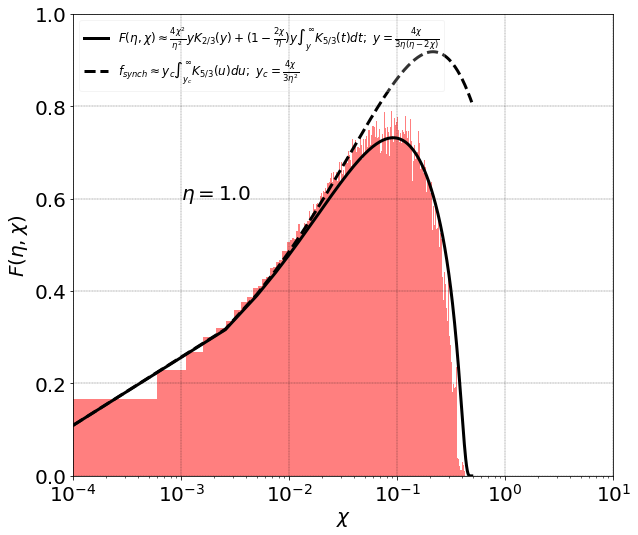

In [146]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import kv
  
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',
        'style'  : 'normal',
        'color'  : 'black',
            'weight' : 'normal',
        'size'   : 20,
       }
font_size = 20

gg=np.loadtxt('./Data_1/px_0.txt')
b0=np.loadtxt('./Data_1/bz_part_0.txt')
t0=np.loadtxt('./Data_1/t_0.txt')
gg = gg[0]
b0 = b0[1]
t0 = t0[-1]

insert1='./Data_1/'
insert_n='_0'
photon=np.loadtxt(insert1+'qed_photon'+insert_n+'.txt')
chi   = photon*b0/2.0/4.1e5
gamma = gg
eta   = gg*b0/4.1e5
dt    = t0/6.28*3.333e-15

num_bins = 1000

weight_photon = gamma/eta*h_planck*chi/1.7/(m0*v0**2)*137/dt/(0.5/num_bins)
#weight_photon = gamma
# the histogram of the data
n, bins, patches = plt.hist(chi, num_bins,weights=weight_photon, range=(1e-4,0.5), normed=0, facecolor='red', alpha=0.5)

b0 = 200.0
g0 = 2050.0
eta = g0*b0/4.1e5
#eta = 0.1
chi = np.linspace(1e-4,0.49*eta,200)
y   = 4*chi/(3*eta*(eta-2*chi))
y_c = 4*chi/(3*eta*eta)
F_chi = np.zeros_like(chi)
F_chi_c = np.zeros_like(chi)
for i in range(np.size(chi)):
    result = integrate.quad(lambda x: kv(1.6666666667,x), y[i], 1e4)
    F_chi[i] = 4*chi[i]**2/eta**2*y[i]*kv(0.6666666667,y[i])+(1-2*chi[i]/eta)*y[i]*result[0]
#    print(result)
    result = integrate.quad(lambda x: kv(1.6666666667,x), y_c[i], 1e4)
    F_chi_c[i]=y_c[i]*result[0]
#F_chi_s = 8*chi**2/3/(3)**0.5/np.pi/eta**4*((1+(1-2*chi/eta)**(-2))*0.921*(y)**(-5.0/3) + 2*(1-2*chi/eta)**(-1)*0.307*(y)**(-5.0/3) + (2*chi/eta)**2*(1-2*chi/eta)**(-2)*0.307*(y)**(-5.0/3)  )
plt.plot(chi, F_chi,   '-k',   linewidth=3, label=r'$F(\eta,\chi)\approx\frac{4\chi^2}{\eta^2}yK_{2/3}(y)+(1-\frac{2\chi}{\eta})y\int_{y}^{\infty}K_{5/3}(t)dt;\ y=\frac{4\chi}{3\eta(\eta-2\chi)}$')
plt.plot(chi, F_chi_c, '--k',  linewidth=3, label=r'$f_{synch}\approx y_c\int_{y_c}^{\infty}K_{5/3}(u)du;\ y_c=\frac{4\chi}{3\eta^2}$')

plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.legend(loc='best',fontsize=12,framealpha=0.2)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xlabel(r'$\chi$',fontdict=font)
plt.ylabel(r'$F(\eta,\chi)$',fontdict=font)
plt.xscale('log')
plt.xlim(1e-4,1e1)
plt.ylim(0,1)
plt.text(1e-3,0.6,r'$\eta=1.0$',fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

fig = plt.gcf()
fig.set_size_inches(10, 8.5)
#fig.set_size_inches(5, 4.5)
fig.savefig('./eta=1.png',format='png',dpi=160)
#plt.close("all")

In [32]:
np.logspace(-4,np.log10(0.5*eta),200)

array([0.0001    , 0.00010317, 0.00010645, 0.00010982, 0.00011331,
       0.0001169 , 0.00012061, 0.00012443, 0.00012838, 0.00013245,
       0.00013666, 0.00014099, 0.00014546, 0.00015008, 0.00015484,
       0.00015975, 0.00016482, 0.00017005, 0.00017544, 0.00018101,
       0.00018675, 0.00019267, 0.00019878, 0.00020509, 0.00021159,
       0.00021831, 0.00022523, 0.00023238, 0.00023975, 0.00024735,
       0.0002552 , 0.00026329, 0.00027165, 0.00028026, 0.00028915,
       0.00029833, 0.00030779, 0.00031755, 0.00032763, 0.00033802,
       0.00034874, 0.00035981, 0.00037122, 0.000383  , 0.00039515,
       0.00040768, 0.00042061, 0.00043396, 0.00044772, 0.00046192,
       0.00047658, 0.0004917 , 0.00050729, 0.00052338, 0.00053999,
       0.00055712, 0.00057479, 0.00059302, 0.00061184, 0.00063124,
       0.00065127, 0.00067193, 0.00069324, 0.00071523, 0.00073792,
       0.00076133, 0.00078548, 0.0008104 , 0.00083611, 0.00086263,
       0.00088999, 0.00091822, 0.00094735, 0.0009774 , 0.00100

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


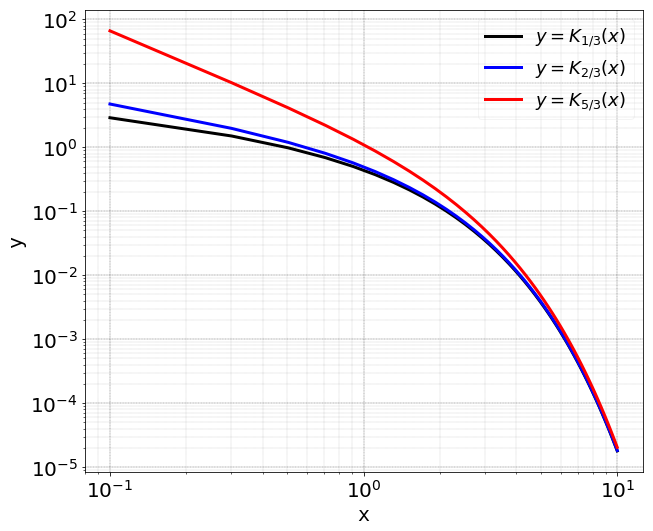

In [136]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import kv
  
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',
        'style'  : 'normal',
        'color'  : 'black',
            'weight' : 'normal',
        'size'   : 20,
       }

font_size = 20 

x = np.linspace(0.1,10.0)

y0=kv(0.3333333333,x)
y1=kv(0.6666666667,x)
y2=kv(1.6666666667,x)

plt.plot(x, y0, '-k',linewidth=3, label=r'$y=K_{1/3}(x)$')
plt.plot(x, y1, '-b',linewidth=3, label=r'$y=K_{2/3}(x)$')
plt.plot(x, y2, '-r',linewidth=3, label=r'$y=K_{5/3}(x)$')

#plt.plot(chi, F_chi_s, '--g',linewidth=1)
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
#cbar.set_label(r'$log_{10}\frac{dI}{\sin\theta d\theta d\omega}$'+' [A.U.]', fontdict=font)
#cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.grid(which='minor',color='k', linestyle='--', linewidth=0.1)
plt.xlabel('x',fontdict=font)
plt.ylabel('y',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.legend(loc='best',fontsize=18,framealpha=0.2)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e-4,1e1)

fig = plt.gcf()
fig.set_size_inches(10, 8.5)
#fig.set_size_inches(5, 4.5)
fig.savefig('./bessel_func.png',format='png',dpi=160)
#plt.close("all")

In [256]:
np.arctan(0.1)/np.pi*180

5.710593137499643

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
2001
[87.99966136 88.99965751 89.99965366 90.99964981 91.99964596]
[  0.          59.99976911 119.99953822 179.99930732 239.99907643
 299.99884554]
60030
(2001, 5, 6)
0090_phi=0180


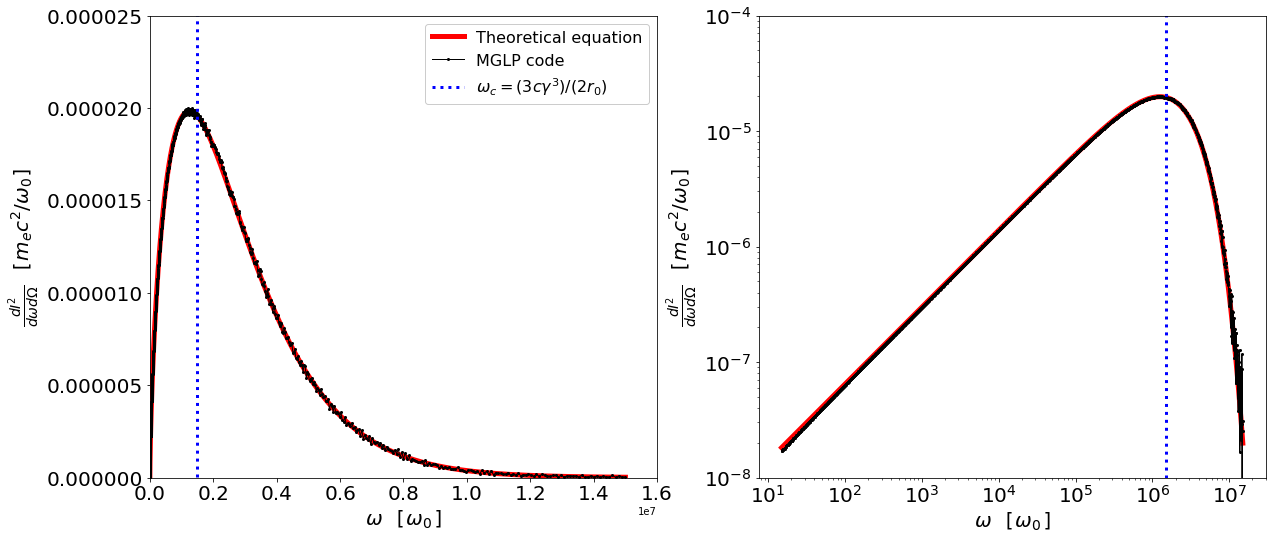

In [283]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special 
from scipy.special import kv

######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 20,  
       }  


font_size = 20

###############read data into array################
from_path = './C-Rad/'
grid_omega_x  = np.loadtxt(from_path+'grid_omega_x.txt')
grid_theta_y  = np.loadtxt(from_path+'grid_theta_y.txt')
grid_phi_z    = np.loadtxt(from_path+'grid_phi_z.txt')
data_I        = np.loadtxt(from_path+'data.txt')

print(grid_omega_x.size)
print(grid_theta_y*pi2d)
print(grid_phi_z*pi2d)
print(data_I.size)

data_I  =  data_I.reshape(grid_omega_x.size, grid_theta_y.size, grid_phi_z.size)

print(data_I.shape)

gg=np.loadtxt('./Data/px_0.txt')
b0=np.loadtxt('./Data/bz_part_0.txt')
gg = gg[0]
b0 = b0[1]
r0=gg/b0
omega_critic = 1.5*gg**3/r0

i_theta = 2
i_phi   = 3

theta_1 = abs(grid_theta_y[i_theta] - pi/2)

#    data_omega = np.sum(np.sum(data_I,axis=2),axis=1)
data_omega = data_I
norm_fac = q0**2/(4*pi*epsilon0*4*pi**2*v0)/(m0*v0**2)*frequency
data_omega = data_omega*norm_fac

xi =  grid_omega_x*r0/3.0/gg**3*(1.0+gg**2*theta_1**2)**1.5

y_line = np.logspace(-8,-1,1000)
x_line = np.zeros_like(y_line)+omega_critic

theory_line = norm_fac*3*(2*grid_omega_x*r0/3.0/gg**2)**2*(1+gg**2*theta_1**2)**2*(kv(0.66666666666667,xi)**2+(gg**2*theta_1**2)/(1.0+gg**2*theta_1**2)*kv(0.3333333333333,xi)**2)

#norm_x = matplotlib.colors.Normalize()
plt.subplot(1,2,1)
plt.plot(grid_omega_x,theory_line,'-r',linewidth=5,label='Theoretical equation')
plt.plot(grid_omega_x, data_omega[:,i_theta,i_phi], 'k', linestyle='-', marker='o', markersize=2,linewidth=1,label='MGLP code')
plt.plot(x_line, y_line, ':b',linewidth=3,label='$\omega_{c}=(3c\gamma^3)/(2r_0)$')
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
#cbar.set_label(r'$log_{10}\frac{dI}{\sin\theta d\theta d\omega}$'+' [A.U.]', fontdict=font)
#cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
#plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.xlabel('$\omega$ [$\omega_0$]',fontdict=font)
plt.ylabel(r'$\frac{dI^2}{d\omega d\Omega}$'+' [$m_ec^2/\omega_0$]',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
#plt.yscale('log')
plt.xlim(0,1.6e7)
plt.ylim(0,2.5e-5)
plt.legend(loc='best',fontsize=16,framealpha=1.0)
#plt.text(285,4e8,'t='+str(round(time/1.0e-15,0))+' fs',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

plt.subplot(1,2,2)
plt.plot(grid_omega_x,theory_line,'-r',linewidth=5,label='theoretical equation')
plt.plot(grid_omega_x, data_omega[:,i_theta,i_phi], 'k', linestyle='-', marker='o', markersize=2,linewidth=1,label='my code calculation')
plt.plot(x_line, y_line, ':b',linewidth=3,label='$\omega_{c}=(3c\gamma^3)/(2r_0)$')
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
#cbar.set_label(r'$log_{10}\frac{dI}{\sin\theta d\theta d\omega}$'+' [A.U.]', fontdict=font)
#cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
#plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.xlabel('$\omega$ [$\omega_0$]',fontdict=font)
plt.ylabel(r'$\frac{dI^2}{d\omega d\Omega}$'+' [$m_ec^2/\omega_0$]',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xscale('log')
plt.yscale('log')
#   plt.xlim(2,6000)
plt.ylim(1e-8,1e-4)
#plt.legend(loc='upper right',fontsize=16,framealpha=1.0)
#plt.text(285,4e8,'t='+str(round(time/1.0e-15,0))+' fs',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

fig = plt.gcf()
fig.set_size_inches(20.0, 8.5)
fig.savefig('./C-Rad/spectral_theta='+str(int(round(grid_theta_y[i_theta]*pi2d,1))).zfill(4)+'_phi='+str(int(round(grid_phi_z[i_phi]*pi2d,1))).zfill(4)+'.png',format='png',dpi=160)
#plt.close("all")
print(str(int(round(grid_theta_y[i_theta]*pi2d,1))).zfill(4)+'_phi='+str(int(round(grid_phi_z[i_phi]*pi2d,1))).zfill(4))


In [378]:
global str

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
201
360
60
4341600
(201, 360, 60)


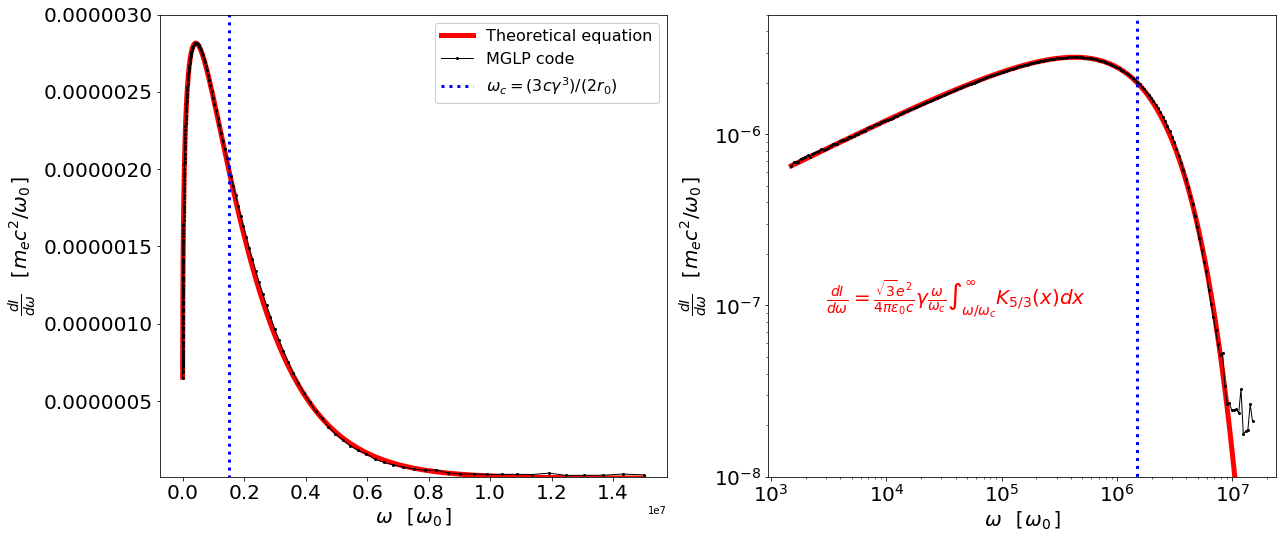

In [8]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special 
from scipy.special import kv

global str
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 20,  
       }  

font_size = 20

###############read data into array################
from_path = './C-Rad/'
grid_omega_x  = np.loadtxt(from_path+'grid_omega_x.txt')
grid_theta_y  = np.loadtxt(from_path+'grid_theta_y.txt')
grid_phi_z    = np.loadtxt(from_path+'grid_phi_z.txt')
data_I        = np.loadtxt(from_path+'data.txt')

print(grid_omega_x.size)
print(grid_theta_y.size)
print(grid_phi_z.size)
print(data_I.size)

data_I  =  data_I.reshape(grid_omega_x.size, grid_theta_y.size, grid_phi_z.size)
print(data_I.shape)

gg=np.loadtxt('./Data/px_0.txt')
b0=np.loadtxt('./Data/bz_part_0.txt')
gg = gg[0]
b0 = b0[1]
r0=gg/b0
omega_critic = 1.5*gg**3/r0

for i_theta in range(grid_theta_y.size):
    data_I[:, i_theta, :] = data_I[:, i_theta, :]*np.sin(grid_theta_y[i_theta])*(grid_theta_y[-1]-grid_theta_y[-2])*(grid_phi_z[-1]-grid_phi_z[-2])
        

theta_1 = 0.0
data_omega = np.sum(np.sum(data_I,axis=2),axis=1)
norm_fac = q0**2/(4*pi*epsilon0*4*pi**2*v0)/(m0*v0**2)*frequency
data_omega = data_omega*norm_fac

y_line = np.linspace(1e-9,5e-1,1000)
x_line = np.zeros_like(y_line)+omega_critic

theory_line = np.zeros_like(grid_omega_x)
for i_omega in range(grid_omega_x.size):
    result = integrate.quad(lambda x: kv(1.6666666667,x), grid_omega_x[i_omega]/omega_critic, 1e4)
    theory_line[i_omega] = 3**0.5*q0**2/(4*pi*epsilon0*v0)*gg*grid_omega_x[i_omega]/omega_critic*result[0]/(m0*v0**2)*frequency


#norm_x = matplotlib.colors.Normalize()
plt.subplot(1,2,1)
plt.plot(grid_omega_x,theory_line,'-r',linewidth=5,label='Theoretical equation')
plt.plot(grid_omega_x, data_omega, 'k', linestyle='-', marker='o', markersize=2,linewidth=1,label='MGLP code')
plt.plot(x_line, y_line, ':b',linewidth=3,label='$\omega_{c}=(3c\gamma^3)/(2r_0)$')
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
#cbar.set_label(r'$log_{10}\frac{dI}{\sin\theta d\theta d\omega}$'+' [A.U.]', fontdict=font)
#cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
#plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.xlabel('$\omega$ [$\omega_0$]',fontdict=font)
plt.ylabel(r'$\frac{dI}{d\omega}$'+' [$m_ec^2/\omega_0$]',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
#plt.yscale('log')
#plt.xlim(0,5e-6)
plt.ylim(1e-8,3e-6)
plt.legend(loc='best',fontsize=16,framealpha=1.0)
#plt.text(285,4e8,'t='+str(round(time/1.0e-15,0))+' fs',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

plt.subplot(1,2,2)
plt.plot(grid_omega_x,theory_line,'-r',linewidth=5,label='theoretical equation')
plt.plot(grid_omega_x, data_omega, 'k', linestyle='-', marker='o', markersize=2,linewidth=1,label='my code calculation')
plt.plot(x_line, y_line, ':b',linewidth=3,label='$\omega_{c}=(3c\gamma^3)/(2r_0)$')
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
#cbar.set_label(r'$log_{10}\frac{dI}{\sin\theta d\theta d\omega}$'+' [A.U.]', fontdict=font)
#cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
#plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.xlabel('$\omega$ [$\omega_0$]',fontdict=font)
plt.ylabel(r'$\frac{dI}{d\omega}$'+' [$m_ec^2/\omega_0$]',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xscale('log')
plt.yscale('log')
#   plt.xlim(2,6000)
plt.ylim(1e-8,5e-6)
#plt.legend(loc='upper right',fontsize=16,framealpha=1.0)
plt.text(3e3,1e-7,r'$\frac{dI}{d\omega}=\frac{\sqrt{3}e^2}{4\pi\epsilon_0c}\gamma\frac{\omega}{\omega_c}\int_{\omega/\omega_c}^{\infty}K_{5/3}(x)dx$',color='r',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

fig = plt.gcf()
fig.set_size_inches(20.0, 8.5)
fig.savefig('./C-Rad/classical_spectrum_total.png',format='png',dpi=160)
#plt.close("all")
#print(str(int(round(grid_theta_y[i_theta]*pi2d,1))).zfill(4)+'_phi='+str(int(round(grid_phi_z[i_phi]*pi2d,1))).zfill(4))


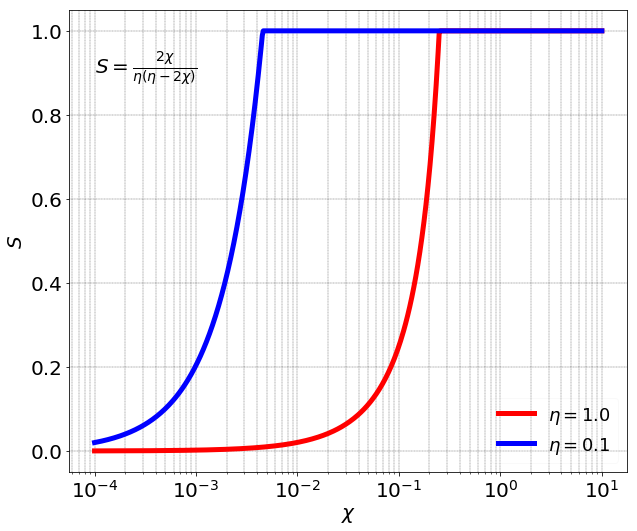

In [12]:
eta = 1.0

chi = np.logspace(-4,1,500)
S = 2*chi/eta/(eta-2*chi)
S[S>1] = 1
S[S<0] = 1
plt.plot(chi,S,'-r',linewidth=5,label=r'$\eta=1.0$')

eta = 0.1

chi = np.logspace(-4,1,500)
S = 2*chi/eta/(eta-2*chi)
S[S>1] = 1
S[S<0] = 1
plt.plot(chi,S,'-b',linewidth=5,label=r'$\eta=0.1$')


plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.grid(which='minor',color='k', linestyle='--', linewidth=0.3)

plt.xlabel(r'$\chi$',fontdict=font)
plt.ylabel(r'$S$',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xscale('log')
#plt.yscale('log')
#   plt.xlim(2,6000)
#plt.ylim(1e-8,1e-4)
plt.legend(loc='lower right',fontsize=18,framealpha=0.10)
plt.text(1e-4,0.9,r'$S=\frac{2\chi}{\eta(\eta-2\chi)}$',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

fig = plt.gcf()
fig.set_size_inches(10.0, 8.5)
#fig.savefig('./C-Rad/spectral_theta='+str(int(round(grid_theta_y[i_theta]*pi2d,1))).zfill(4)+'_phi='+str(int(round(grid_phi_z[i_phi]*pi2d,1))).zfill(4)+'.png',format='png',dpi=160)
#plt.close("all")

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27


/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


201
360
60
4341600
(201, 360, 60)


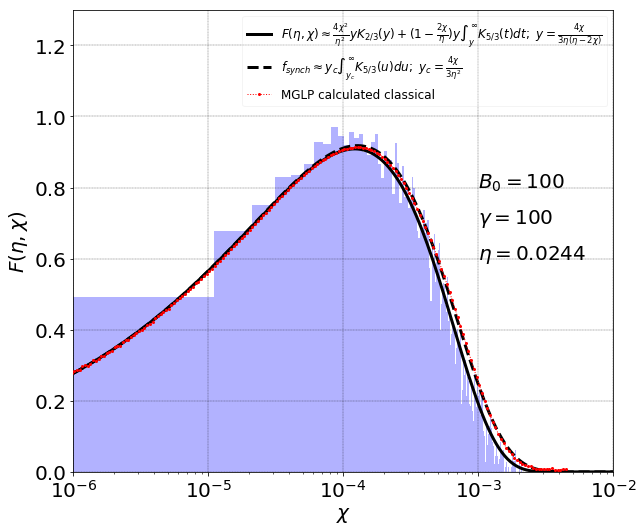

In [31]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import kv
  
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',
        'style'  : 'normal',
        'color'  : 'black',
            'weight' : 'normal',
        'size'   : 20,
       }

font_size =20
gg=np.loadtxt('./Data/px_0.txt')
b0=np.loadtxt('./Data/bz_part_0.txt')
t0=np.loadtxt('./Data/t_0.txt')
gg = gg[1]
b0 = b0[1]
t0 = t0[-1]

insert1='./Data/'
insert_n='_0'
photon=np.loadtxt(insert1+'qed_photon'+insert_n+'.txt')
chi   = photon*b0/2.0/4.1e5
gamma = gg
eta   = gg*b0/4.1e5
dt    = t0/6.28*3.333e-15

num_bins = 1000


weight_photon = gamma/eta*h_planck*chi/1.7/(m0*v0**2)*137/dt/(0.01/num_bins)
#weight_photon = gamma
# the histogram of the data
n, bins, patches = plt.hist(chi, num_bins,weights=weight_photon, range=(1e-6,1e-2), normed=0, facecolor='blue', alpha=0.3, zorder=0)
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)


b0 = 100.0
g0 = 100.0
eta = g0*b0/4.1e5
#eta = 0.1
chi = np.logspace(-6,np.log10(0.49*eta),200)
y   = 4*chi/(3*eta*(eta-2*chi))
y_c = 4*chi/(3*eta*eta)
F_chi = np.zeros_like(chi)
F_chi_c = np.zeros_like(chi)
for i in range(np.size(chi)):
    result = integrate.quad(lambda x: kv(1.6666666667,x), y[i], 1e4)
    F_chi[i] = 4*chi[i]**2/eta**2*y[i]*kv(0.6666666667,y[i])+(1-2*chi[i]/eta)*y[i]*result[0]
#    print(result)
    result = integrate.quad(lambda x: kv(1.6666666667,x), y_c[i], 1e4)
    F_chi_c[i]=y_c[i]*result[0]
#F_chi_s = 8*chi**2/3/(3)**0.5/np.pi/eta**4*((1+(1-2*chi/eta)**(-2))*0.921*(y)**(-5.0/3) + 2*(1-2*chi/eta)**(-1)*0.307*(y)**(-5.0/3) + (2*chi/eta)**2*(1-2*chi/eta)**(-2)*0.307*(y)**(-5.0/3)  )
plt.plot(chi, F_chi,   '-k',   linewidth=3, label=r'$F(\eta,\chi)\approx\frac{4\chi^2}{\eta^2}yK_{2/3}(y)+(1-\frac{2\chi}{\eta})y\int_{y}^{\infty}K_{5/3}(t)dt;\ y=\frac{4\chi}{3\eta(\eta-2\chi)}$',zorder=1)
plt.plot(chi, F_chi_c, '--k',  linewidth=3, label=r'$f_{synch}\approx y_c\int_{y_c}^{\infty}K_{5/3}(u)du;\ y_c=\frac{4\chi}{3\eta^2}$',zorder=2)



###############read data to calculate calssical################
from_path = './C-Rad_g100_b100_figure/'
grid_omega_x  = np.loadtxt(from_path+'grid_omega_x.txt')
grid_theta_y  = np.loadtxt(from_path+'grid_theta_y.txt')
grid_phi_z    = np.loadtxt(from_path+'grid_phi_z.txt')
data_I        = np.loadtxt(from_path+'data.txt')

print(grid_omega_x.size)
print(grid_theta_y.size)
print(grid_phi_z.size)
print(data_I.size)

data_I  =  data_I.reshape(grid_omega_x.size, grid_theta_y.size, grid_phi_z.size)
print(data_I.shape)

#gg=np.loadtxt('./Data/px_0.txt')
#b0=np.loadtxt('./Data/bz_part_0.txt')
gg = 100.0
b0 = 100.0
r0=gg/b0
omega_critic = 1.5*gg**3/r0

for i_theta in range(grid_theta_y.size):
    data_I[:, i_theta, :] = data_I[:, i_theta, :]*np.sin(grid_theta_y[i_theta])*(grid_theta_y[-1]-grid_theta_y[-2])*(grid_phi_z[-1]-grid_phi_z[-2])
        

theta_1 = 0.0
data_omega = np.sum(np.sum(data_I,axis=2),axis=1)
norm_fac = q0**2/(4*pi*epsilon0*4*pi**2*v0)/(m0*v0**2)*frequency
data_omega = data_omega*norm_fac


chi = grid_omega_x*1.24/(2*0.51e6)*100.0/4.1e5
eta=1e4/4.1e5

f_cla = data_omega*gg/3**0.5*137/eta*1.0


plt.plot(chi, f_cla, 'r', linestyle=':', marker='o', markersize=2,linewidth=1,label='MGLP calculated classical',zorder=3)




plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.legend(loc='best',fontsize=12,framealpha=0.2)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xlabel(r'$\chi$',fontdict=font)
plt.ylabel(r'$F(\eta,\chi)$',fontdict=font)
plt.xscale('log')
plt.xlim(1e-6,1e-2)
plt.ylim(0,1.3)
plt.text(1e-3,0.6,r'$\eta=0.0244$',fontdict=font)
plt.text(1e-3,0.7,r'$\gamma=100$',fontdict=font)
plt.text(1e-3,0.8,r'$B_0=100$',fontdict=font)


# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

fig = plt.gcf()
fig.set_size_inches(10, 8.5)
#fig.set_size_inches(5, 4.5)
fig.savefig('./eta=00244.png',format='png',dpi=160)
#plt.close("all")

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
101
180
60
1090800
(101, 180, 60)
350678391649.6865


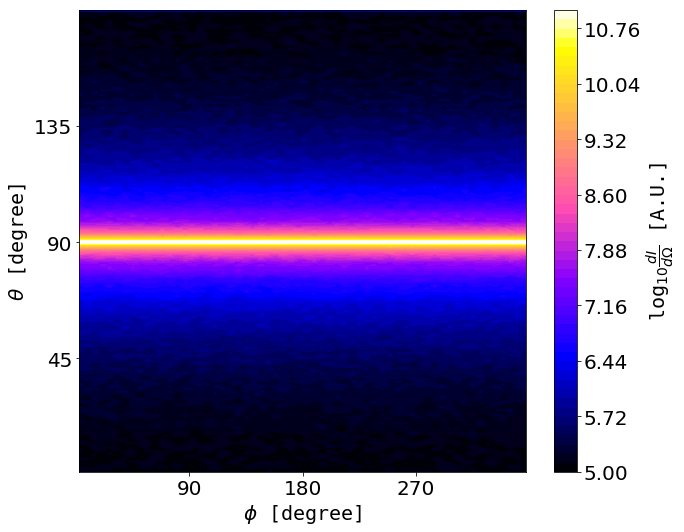

In [74]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special 

######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 20,  
       }  

###############read data into array################
from_path = './C-Rad/'
grid_omega_x  = np.loadtxt(from_path+'grid_omega_x.txt')
grid_theta_y  = np.loadtxt(from_path+'grid_theta_y.txt')
grid_phi_z    = np.loadtxt(from_path+'grid_phi_z.txt')
data_I        = np.loadtxt(from_path+'data.txt')

#grid_theta_y = pi-grid_theta_y

print(grid_omega_x.size)
print(grid_theta_y.size)
print(grid_phi_z.size)
print(data_I.size)

k= grid_omega_x[-1]/grid_omega_x[-2]

data_I  =  data_I.reshape(grid_omega_x.size, grid_theta_y.size, grid_phi_z.size)
print(data_I.shape)

data_Z = np.sum(data_I*grid_omega_x.reshape(grid_omega_x.size, 1, 1)*(k**2-1)/k,axis=0)

print(np.max(data_Z))
X, Y = np.meshgrid(grid_phi_z*pi2d, grid_theta_y*pi2d)


data_Z=np.log10(data_Z+1)
data_Z[data_Z<5]=5
levels = np.linspace(5, 11, 51)

#norm_x = matplotlib.colors.Normalize()
#data_Z

#plt.subplots(subplot_kw=dict(projection='polar'))
#plt.contourf(X, Y, data_Z, levels=levels, norm=colors.LogNorm(vmin=data_Z.min(), vmax=data_Z.max()), cmap='magma')
plt.contourf(X, Y, data_Z, levels=levels, cmap='gnuplot2')
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
cbar=plt.colorbar()
cbar.set_label('log'+r'$_{10}\frac{dI}{d\Omega}$'+' [A.U.]', fontdict=font)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
#plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.xlabel('$\phi$'+' [degree]',fontdict=font)
plt.ylabel(r'$\theta$'+' [degree]',fontdict=font)
plt.xticks([90,180,270],fontsize=20); plt.yticks([45,90,135],fontsize=20);
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0,400)
#plt.legend(loc='upper right',fontsize=16,framealpha=1.0)
#plt.text(285,4e8,'t='+str(round(time/1.0e-15,0))+' fs',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

fig = plt.gcf()
fig.set_size_inches(10.0, 8.5)
#fig.savefig('./spectral_phi_theta.png',format='png',dpi=160)
#plt.close("all")

electric field unit: 3210700953900.7065
magnetic field unit: 10709.745586397328
density unit nc: 1.1148542159362525e+27
101
180
60
1090800
(101, 180, 60)
277921.77193344024


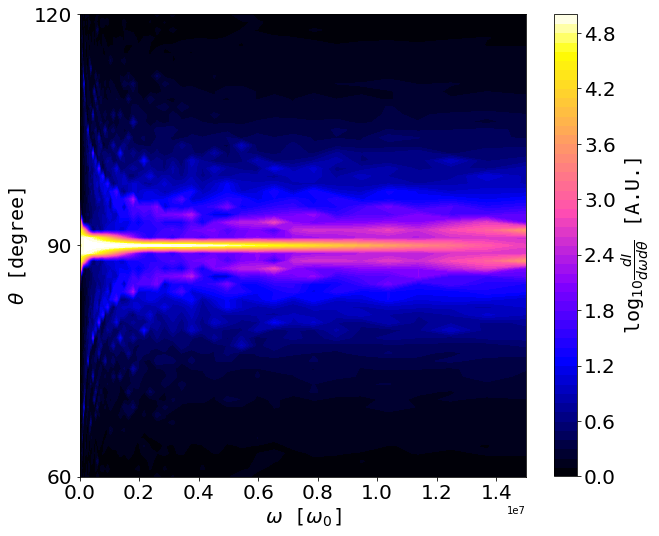

In [80]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special 

######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
        'style'  : 'normal',
        'color'  : 'black',  
	    'weight' : 'normal',  
        'size'   : 20,  
       }  

###############read data into array################
from_path = './C-Rad/'
grid_omega_x  = np.loadtxt(from_path+'grid_omega_x.txt')
grid_theta_y  = np.loadtxt(from_path+'grid_theta_y.txt')
grid_phi_z    = np.loadtxt(from_path+'grid_phi_z.txt')
data_I        = np.loadtxt(from_path+'data.txt')

#grid_theta_y = pi-grid_theta_y

print(grid_omega_x.size)
print(grid_theta_y.size)
print(grid_phi_z.size)
print(data_I.size)

k= grid_omega_x[-1]/grid_omega_x[-2]

data_I  =  data_I.reshape(grid_omega_x.size, grid_theta_y.size, grid_phi_z.size)
print(data_I.shape)

data_Z = np.sum(data_I*2*pi/grid_phi_z.size,axis=2)

print(np.max(data_Z))
X, Y = np.meshgrid(grid_omega_x, grid_theta_y*pi2d)


data_Z=np.log10(data_Z+1)
#data_Z[data_Z<5]=5
levels = np.linspace(0, 5, 51)

#norm_x = matplotlib.colors.Normalize()
#data_Z

#plt.subplots(subplot_kw=dict(projection='polar'))
#plt.contourf(X, Y, data_Z, levels=levels, norm=colors.LogNorm(vmin=data_Z.min(), vmax=data_Z.max()), cmap='magma')
plt.contourf(X, Y, data_Z.T, levels=levels, cmap='gnuplot2')
#cbar=plt.colorbar(ticks=np.linspace(0.0, 4, 5))
cbar=plt.colorbar()
cbar.set_label('log'+r'$_{10}\frac{dI}{d\omega d\theta}$'+' [A.U.]', fontdict=font)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=20)
#plt.plot(x_omega,np.sum(np.sum(data_I_t,axis=0),axis=0),'-b',linewidth=3)
#### manifesting colorbar, changing label and axis properties ####
#plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.xlabel('$\omega$'+' [$\omega_0$]',fontdict=font)
plt.ylabel(r'$\theta$'+' [degree]',fontdict=font)
plt.xticks(fontsize=20); plt.yticks([60,90,120],fontsize=20);
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(60,120)
#plt.legend(loc='upper right',fontsize=16,framealpha=1.0)
#plt.text(285,4e8,'t='+str(round(time/1.0e-15,0))+' fs',fontdict=font)
#plt.subplots_adjust(left=0.2, bottom=None, right=0.88, top=None,wspace=None, hspace=None)

fig = plt.gcf()
fig.set_size_inches(10.0, 8.5)
#fig.savefig('./spectral_phi_theta.png',format='png',dpi=160)
#plt.close("all")

In [ ]:
import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import kv
  
######## Constant defined here ########
pi        =     3.1415926535897932384626
pi2d      =     180./pi
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',
        'style'  : 'normal',
        'color'  : 'black',
            'weight' : 'normal',
        'size'   : 20,
       }

font_size =20
gg=np.loadtxt('./Data/px_0.txt')
b0=np.loadtxt('./Data/bz_part_0.txt')
t0=np.loadtxt('./Data/t_0.txt')
gg = gg[0]
b0 = b0[1]
t0 = t0[-1]

insert1='./Data/'
insert_n='_0'
photon=np.loadtxt(insert1+'qed_photon'+insert_n+'.txt')
chi   = photon*b0/2.0/4.1e5
gamma = gg
eta   = gg*b0/4.1e5
dt    = t0/6.28*3.333e-15

num_bins = 1000


weight_photon = gamma/eta*h_planck*chi/1.7/(m0*v0**2)*137/dt/(0.01/num_bins)
#weight_photon = gamma
# the histogram of the data
n, bins, patches = plt.hist(chi, num_bins,weights=weight_photon, range=(1e-6,1e-2), normed=0, facecolor='blue', alpha=0.3, zorder=0)
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)


b0 = 100.0
g0 = 100.0
eta = g0*b0/4.1e5
#eta = 0.1
chi = np.logspace(-6,np.log10(0.49*eta),200)
y   = 4*chi/(3*eta*(eta-2*chi))
y_c = 4*chi/(3*eta*eta)
F_chi = np.zeros_like(chi)
F_chi_c = np.zeros_like(chi)
for i in range(np.size(chi)):
    result = integrate.quad(lambda x: kv(1.6666666667,x), y[i], 1e4)
    F_chi[i] = 4*chi[i]**2/eta**2*y[i]*kv(0.6666666667,y[i])+(1-2*chi[i]/eta)*y[i]*result[0]
#    print(result)
    result = integrate.quad(lambda x: kv(1.6666666667,x), y_c[i], 1e4)
    F_chi_c[i]=y_c[i]*result[0]
#F_chi_s = 8*chi**2/3/(3)**0.5/np.pi/eta**4*((1+(1-2*chi/eta)**(-2))*0.921*(y)**(-5.0/3) + 2*(1-2*chi/eta)**(-1)*0.307*(y)**(-5.0/3) + (2*chi/eta)**2*(1-2*chi/eta)**(-2)*0.307*(y)**(-5.0/3)  )
plt.plot(chi, F_chi,   '-k',   linewidth=3, label=r'$F(\eta,\chi)\approx\frac{4\chi^2}{\eta^2}yK_{2/3}(y)+(1-\frac{2\chi}{\eta})y\int_{y}^{\infty}K_{5/3}(t)dt;\ y=\frac{4\chi}{3\eta(\eta-2\chi)}$',zorder=1)
plt.plot(chi, F_chi_c, '--k',  linewidth=3, label=r'$f_{synch}\approx y_c\int_{y_c}^{\infty}K_{5/3}(u)du;\ y_c=\frac{4\chi}{3\eta^2}$',zorder=2)



###############read data to calculate calssical################
from_path = './C-Rad_g100_b100_figure/'
grid_omega_x  = np.loadtxt(from_path+'grid_omega_x.txt')
grid_theta_y  = np.loadtxt(from_path+'grid_theta_y.txt')
grid_phi_z    = np.loadtxt(from_path+'grid_phi_z.txt')
data_I        = np.loadtxt(from_path+'data.txt')

print(grid_omega_x.size)
print(grid_theta_y.size)
print(grid_phi_z.size)
print(data_I.size)

data_I  =  data_I.reshape(grid_omega_x.size, grid_theta_y.size, grid_phi_z.size)
print(data_I.shape)

#gg=np.loadtxt('./Data/px_0.txt')
#b0=np.loadtxt('./Data/bz_part_0.txt')
gg = 100.0
b0 = 100.0
r0=gg/b0
omega_critic = 1.5*gg**3/r0

for i_theta in range(grid_theta_y.size):
    data_I[:, i_theta, :] = data_I[:, i_theta, :]*np.sin(grid_theta_y[i_theta])*(grid_theta_y[-1]-grid_theta_y[-2])*(grid_phi_z[-1]-grid_phi_z[-2])
        

theta_1 = 0.0
data_omega = np.sum(np.sum(data_I,axis=2),axis=1)
norm_fac = q0**2/(4*pi*epsilon0*4*pi**2*v0)/(m0*v0**2)*frequency
data_omega = data_omega*norm_fac


chi = grid_omega_x*1.24/(2*0.51e6)*100.0/4.1e5
eta=1e4/4.1e5

f_cla = data_omega*gg/3**0.5*137/eta*1.0


plt.plot(chi, f_cla, 'r', linestyle=':', marker='o', markersize=2,linewidth=1,label='MGLP calculated classical',zorder=3)




plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.legend(loc='best',fontsize=12,framealpha=0.2)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.xlabel(r'$\chi$',fontdict=font)
plt.ylabel(r'$F(\eta,\chi)$',fontdict=font)
plt.xscale('log')
plt.xlim(1e-6,1e-2)
plt.ylim(0,1.3)
plt.text(1e-3,0.6,r'$\eta=0.0244$',fontdict=font)
plt.text(1e-3,0.7,r'$\gamma=100$',fontdict=font)
plt.text(1e-3,0.8,r'$B_0=100$',fontdict=font)


# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

fig = plt.gcf()
fig.set_size_inches(10, 8.5)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./eta=00244.png',format='png',dpi=160)
#plt.close("all")